# Tutorial

In [1]:
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

## ExperimentalData 

Since MAGINE is built for multi-sample, multi-omics data, it is no surprise that the data is the most important aspect. Here we should how to use the :py:class:`ExperimentalData` class. 

In [3]:
# load the experimental data
from magine.data.experimental_data import load_data_csv

exp_data = load_data_csv('Data/norris_et_al_2017_cisplatin_data.csv.gz', low_memory=False)

In [4]:
help(exp_data)

Help on ExperimentalData in module magine.data.experimental_data object:

class ExperimentalData(builtins.object)
 |  Manages all experimental data
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, name)
 |  
 |  __init__(self, data_file)
 |      Parameters
 |      ----------
 |      data_file : str, pandas.DataFrame
 |          Name of file, generally csv.
 |          If provided a str, the file will be read in as a pandas.DataFrame
 |  
 |  __setattr__(self, name, value)
 |      Implement setattr(self, name, value).
 |  
 |  create_table_of_data(self, sig=False, unique=False, save_name=None, plot=False, write_latex=False)
 |      Creates a summary table of data.
 |      
 |      
 |      Parameters
 |      ----------
 |      sig: bool
 |          Flag to summarize significant species only
 |      save_name: str
 |          Name to save csv and .tex file
 |      unique: bool
 |          If you want to only consider unique species
 |          ie count gene species rather than P

### Getting counts from data

In [5]:
display(exp_data.create_table_of_data())
display(exp_data.create_table_of_data(sig=True))
display(exp_data.create_table_of_data(sig=True, unique=True))

sample_id,01hr,06hr,24hr,48hr,Total Unique Across
source,,,,,
C18,528,227,657,689,1412
HILIC,479,611,941,621,1521
label_free,3135,3091,2735,2504,4036
ph_silac,6903,10956,12176,11183,21924
rna_seq,18741,19104,19992,-,20642
silac,2923,3357,3072,3265,4086


sample_id,01hr,06hr,24hr,48hr,Total Unique Across
source,,,,,
C18,528,227,657,689,1412
HILIC,479,611,941,621,1521
label_free,201,46,281,911,1149
ph_silac,594,1370,2414,1368,4757
rna_seq,73,1999,12215,-,12340
silac,38,52,228,266,485


sample_id,01hr,06hr,24hr,48hr,Total Unique Across
source,,,,,
C18,522,227,653,685,1402
HILIC,471,605,930,613,1504
label_free,196,46,271,874,1085
ph_silac,514,888,1227,851,2278
rna_seq,73,1999,12215,-,12340
silac,38,52,228,266,485


In [6]:
exp_data.species.head(5)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.00102,True,06hr,rna_seq


### Filter  by category (experimental method)

The '.species' index aggregates all data. 

MAGINE uses the 'species_type' and 'source' column name to split data into 'compounds', 'genes' (includes 'species_type'=='gene'), 'rna' (includes 'species_type'=='gene', 'source' == 'rna'), or 'protein' ('species_type'=='gene', 'source' != 'rna'). 
They can be accessed with the ".prefix", such as


In [7]:
exp_data.genes.head(5)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.00102,True,06hr,rna_seq


In [8]:
exp_data.rna.head(5)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.00102,True,06hr,rna_seq


In [9]:
exp_data.compounds.head(5)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
128152,HMDB0036114,(-)-3-Thujone,metabolites,1.6,2.100000e-02,True,06hr,C18
128153,HMDB0001320,"(13E)-11a-Hydroxy-9,15-dioxoprost-13-enoic acid",metabolites,88.8,5.800000e-12,True,24hr,C18
128154,HMDB0012113,(22Alpha)-hydroxy-campest-4-en-3-one,metabolites,100.0,9.500000e-04,True,48hr,HILIC
128155,HMDB0010361,"(23S)-23,25-dihdroxy-24-oxovitamine D3 23-(bet...",metabolites,-100.0,1.000000e-12,True,48hr,C18
128156,HMDB0011644,"(24R)-Cholest-5-ene-3-beta,7-alpha,24-triol",metabolites,1.6,7.400000e-05,True,01hr,C18


Similarily, we can also filter the data by 'source' using the '.name', where name is anything in the 'source' column. We can get a list of these by printing exp_data.exp_methods 


In [10]:
# prints all the available exp_methods
exp_data.exp_methods

['rna_seq', 'ph_silac', 'label_free', 'silac', 'C18', 'HILIC']

In [11]:
# filters to only the 'label_free' 
exp_data.label_free.shape

(13085, 8)

In [12]:
exp_data.label_free.head(5)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
102446,LIMS1,LIMS1_lf,protein,12.42,0.00003,True,01hr,label_free
102447,SMARCE1,SMARCE1_lf,protein,-2.49,0.00030,True,01hr,label_free
102448,HEXA,HEXA_lf,protein,6.42,0.00060,True,01hr,label_free
102449,SRSF1,SRSF1_lf,protein,-3.21,0.00060,True,01hr,label_free
102450,SF3B1,SF3B1_lf,protein,-1.57,0.00130,True,01hr,label_free


In [13]:
exp_data.HILIC.head(5)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
128154,HMDB0012113,(22Alpha)-hydroxy-campest-4-en-3-one,metabolites,100.0,0.000950,True,48hr,HILIC
128157,HMDB0011644,"(24R)-Cholest-5-ene-3-beta,7-alpha,24-triol",metabolites,1.7,0.000072,True,24hr,HILIC
128162,HMDB0012114,"(3S)-3,6-Diaminohexanoate",metabolites,-1.9,0.000030,True,06hr,HILIC
128164,HMDB0012114,"(3S)-3,6-Diaminohexanoate",metabolites,-3.0,0.002000,True,24hr,HILIC
128166,HMDB0012115,"(3S,5S)-3,5-Diaminohexanoate",metabolites,-1.9,0.000030,True,06hr,HILIC


### Significant filter 
We can use the 'significant_flag' column to filter that data to only contain those species.

In [14]:
exp_data.rna_seq.sig.head(5)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.00102,True,06hr,rna_seq


### Filter data to up or down regulated species.

For enrichment analysis, we will want to access up-regulated and down-regulated species.

In [15]:
exp_data.rna_seq.up.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
13,DLX2,DLX2_rnaseq,protein,2.874358,0.001020,True,06hr,rna_seq
18,RETSAT,RETSAT_rnaseq,protein,2.325934,0.001020,True,06hr,rna_seq
21,SLC52A1,SLC52A1_rnaseq,protein,2.871869,0.001020,True,06hr,rna_seq
24,OTUD3,OTUD3_rnaseq,protein,1.821775,0.001020,True,06hr,rna_seq
35,RP11-209D14.2,RP11-209D14.2_rnaseq,protein,1.819533,0.025204,True,06hr,rna_seq
58,ZNF554,ZNF554_rnaseq,protein,2.309691,0.004153,True,06hr,rna_seq
59,FZD9,FZD9_rnaseq,protein,1.812798,0.001020,True,06hr,rna_seq
71,SBK1,SBK1_rnaseq,protein,1.806427,0.002689,True,06hr,rna_seq
88,PPM1D,PPM1D_rnaseq,protein,1.803186,0.001020,True,06hr,rna_seq
92,ZNF425,ZNF425_rnaseq,protein,2.846581,0.001020,True,06hr,rna_seq


In [16]:
exp_data.rna_seq.down.head(10)

,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.001020,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.001020,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
5,RP11-639F1.1,RP11-639F1.1_rnaseq,protein,-17.888990,0.001020,True,06hr,rna_seq
6,TP63,TP63_rnaseq,protein,-12.355659,0.001020,True,06hr,rna_seq
7,JARID2,JARID2_rnaseq,protein,-7.891502,0.001020,True,06hr,rna_seq
8,GLI2,GLI2_rnaseq,protein,-5.389009,0.001020,True,06hr,rna_seq
9,MAP3K5,MAP3K5_rnaseq,protein,-4.262353,0.001893,True,06hr,rna_seq


### Extracting by sample (time point)

In [17]:
for i in exp_data.sample_ids:
    print(i)
    display(exp_data[i].head(5))

01hr


,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
19160,GRIK4,GRIK4_rnaseq,protein,77.555651,0.019824,True,01hr,rna_seq
19161,GRIK4_3p_UTR,GRIK4_3p_UTR_rnaseq,protein,77.555651,0.019824,True,01hr,rna_seq
19162,AP001187.9,AP001187.9_rnaseq,protein,-25.455050,0.019824,True,01hr,rna_seq
19163,MIR192,MIR192_rnaseq,protein,-25.455050,0.019824,True,01hr,rna_seq
19164,MIR194-2,MIR194-2_rnaseq,protein,-25.455050,0.019824,True,01hr,rna_seq


06hr


,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
0,HOXD1,HOXD1_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
1,MIR7704,MIR7704_rnaseq,protein,-520.256762,0.00102,True,06hr,rna_seq
2,AC078814.1,AC078814.1_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
3,PPM1H,PPM1H_rnaseq,protein,-76.022260,0.00102,True,06hr,rna_seq
4,PLCH1,PLCH1_rnaseq,protein,-17.888990,0.00102,True,06hr,rna_seq


24hr


,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
37960,LHX3,LHX3_rnaseq,protein,202.225343,0.005180,True,24hr,rna_seq
37961,C17orf67,C17orf67_rnaseq,protein,2.571464,0.000123,True,24hr,rna_seq
37962,ALX1,ALX1_rnaseq,protein,-2.572587,0.000123,True,24hr,rna_seq
37963,MIR7844,MIR7844_rnaseq,protein,2.573033,0.009349,True,24hr,rna_seq
37964,TMCC3,TMCC3_rnaseq,protein,2.573033,0.009349,True,24hr,rna_seq


48hr


,identifier,label,species_type,fold_change,p_value,significant,sample_id,source
58025,TNS3,TNS3_1188_1197_phsilac,protein,-3.837129,0.049,True,48hr,ph_silac
58026,SIPA1L3,SIPA1L3_S(ph)158_phsilac,protein,-5.119600,0.049,True,48hr,ph_silac
58027,TNS3,TNS3_Y(ph)780_phsilac,protein,-4.986421,0.049,True,48hr,ph_silac
58028,FGD6,FGD6_S(ph)554_phsilac,protein,-3.900705,0.049,True,48hr,ph_silac
58029,GPN1,GPN1_S(ph)312_phsilac,protein,2.901199,0.049,True,48hr,ph_silac


### Pivot table to get table across time

In [18]:
exp_data.label_free.pivoter(
    convert_to_log=False, 
    index='identifier',
    columns='sample_id',
    values=['fold_change', 'p_value']
).head(10)

fold_change                        p_value                    \
sample_id         01hr   06hr   24hr   48hr      01hr     06hr     24hr   
identifier                                                                
A2M           1.040000  1.140  51.93  11.58  0.514800  0.44370  0.24260   
AACS         -1.100000  3.740    NaN    NaN  0.281800  0.26950      NaN   
AAGAB         1.000000 -1.150   1.46  -2.03  0.968100  0.39240  0.84450   
AAK1          1.320000  1.590    NaN   1.72  0.715800  0.18110      NaN   
AAMP         -1.200000 -1.460   1.85   1.78  0.836800  0.55420  0.13640   
AAR2               NaN -1.690    NaN    NaN       NaN  0.96510      NaN   
AARS          0.326667 -0.035  -1.44  -3.12  0.299867  0.62425  0.46725   
AARS2         1.170000    NaN    NaN    NaN  0.253000      NaN      NaN   
AARSD1        1.210000  4.070  -2.05    NaN  0.459700  0.49160  0.78440   
AASDHPPT     -0.330000  1.020   1.07  -1.11  0.709600  0.81160  0.45290   

                     
sample_id      48hr  
identifier           
A2M         0.11130  
AACS            NaN  
AAGAB       0.09760  
AAK1        0.95660  
AAMP        0.32460  
AAR2            NaN  
AARS        0.00045  
AARS2           NaN  
AARSD1          NaN  
AASDHPPT    0.00070

Note that in the previous two examples, we find that there are NaN values. This is because of our experiental data. We can easy check what species are not found in all 4 of our label free experiements.

In [19]:
print(len(exp_data.label_free.filter_by_minimum_present_columns(
    index='identifier',
    columns='sample_id',
).id_list))

Number in index went from 3447 to 1819
1819


This shows that out of the 3447 unique species measured in label-free proteomics, only 1819 were measured in all time points. What one can do with this information is dependent on the analysis. For now, we will keep using the full dataset.

### Visualizing 

#### Volcano plots

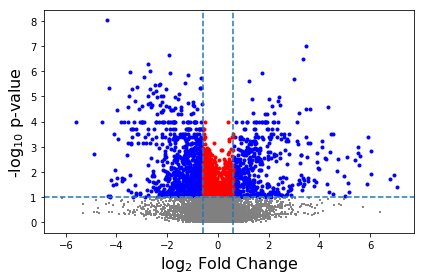

In [33]:
exp_data.label_free.volcano_plot();

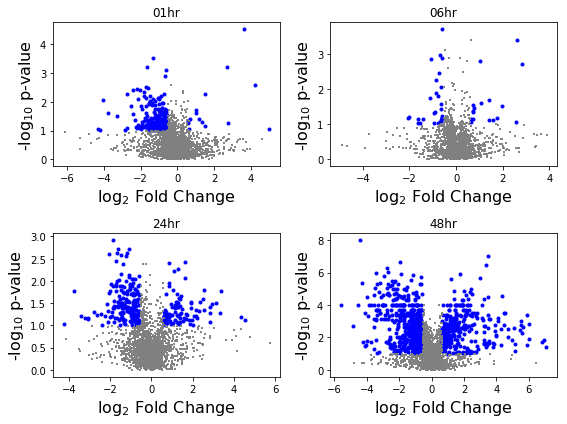

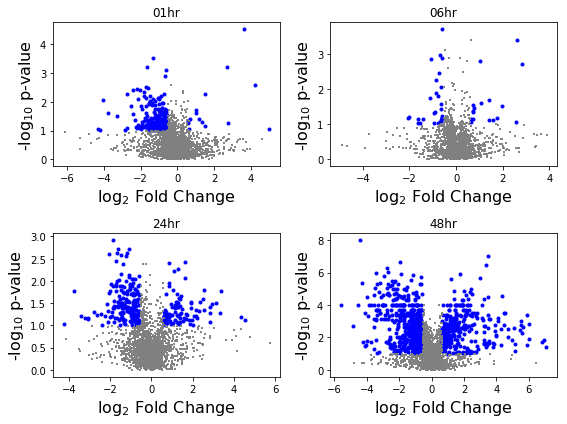

In [34]:
exp_data.label_free.time_series_volcano(sig_column=True)

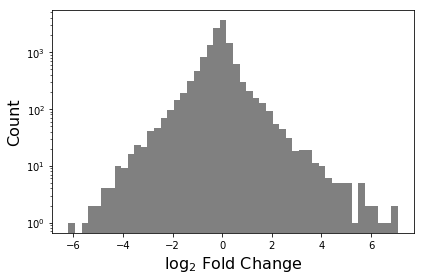

In [35]:
exp_data.label_free.create_histogram_measurements();

### Plotting subset of species

We provide the a few plotting interfaces to explore that subsets of the data. Basically, you create a list of species and provide it to the function. It filters based on these and then returns the results. 


#### Time series using ploty and matplotlib

In [21]:
exp_data.label_free.plot_species(['LMNA', 'VDAC1'], plot_type='plotly')

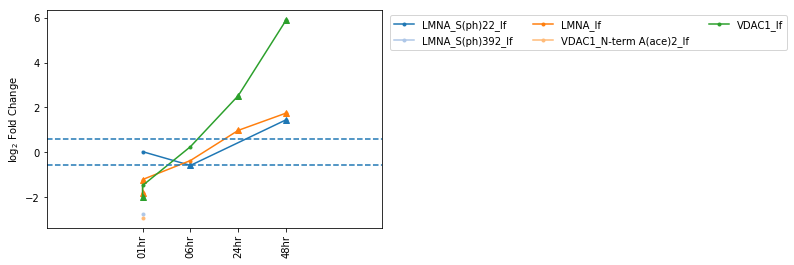

In [22]:
exp_data.label_free.plot_species(['LMNA', 'VDAC1'], plot_type='matplotlib');

#### Heatplots

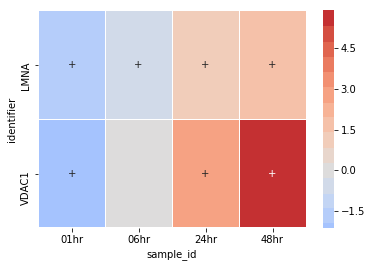

In [25]:
exp_data.label_free.heatmap(
    ['LMNA', 'VDAC1'], 
    figsize=(6,4), 
    linewidths=0.01
);

Notice that the above splot doesn't show any of the modifiers of LMBA (no _s(ph)22_lf). This is because the default index to pivot plots is the 'identifier' column. You can set the 'label' column for plotting by passing index='label' to the function. Note, if you want to filter the data using the more generic 'identifier' column, you just specify that with subset_index='identifier'

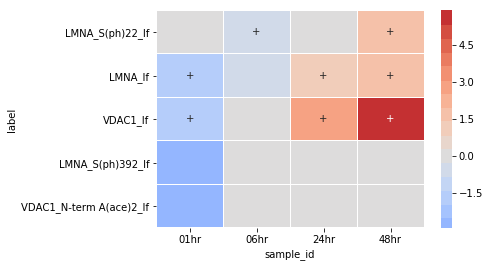

In [26]:
exp_data.label_free.heatmap(
    ['LMNA', 'VDAC1'], 
    subset_index='identifier', 
    index='label',
    figsize=(6,4), 
    linewidths=0.01
);

### Examples

Here are a few examples how all the above commands can be chained together to create plots with varying degrees of critera. 


#### Query 1: 
    Heatmap of label-free proteomics that are signficantly change in at least 3 time points.

Number in index went from 4036 to 48


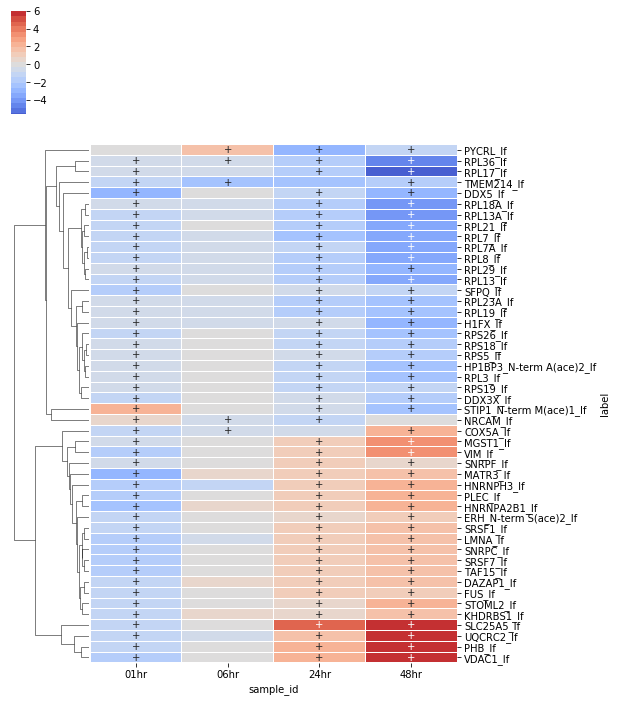

In [36]:
lf_sig = exp_data.label_free.filter_by_minimum_sig_columns(
    index='label', 
    columns='sample_id', 
    min_terms=3
)
lf_sig.heatmap(
    convert_to_log=True, 
    cluster_row=True, 
    index='label',
    values='fold_change', 
    columns='sample_id', 
    annotate_sig=True, 
    figsize=(8, 12), 
    div_colors=True,
    num_colors=21, 
    linewidths=0.01
);

#### Query 2: 
    Changes that happen at all 3 timepoints for RNA-seq.

In [47]:
exp_data.rna.filter_by_minimum_sig_columns(min_terms=3, index='label').plot_species(plot_type='plotly');

Number in index went from 20642 to 19


#### Query 3: 
    Heatmap and time series plot of proteins that are consitantly down regulated at 3 time points. 

Number in index went from 3471 to 90
Number in index went from 3471 to 90


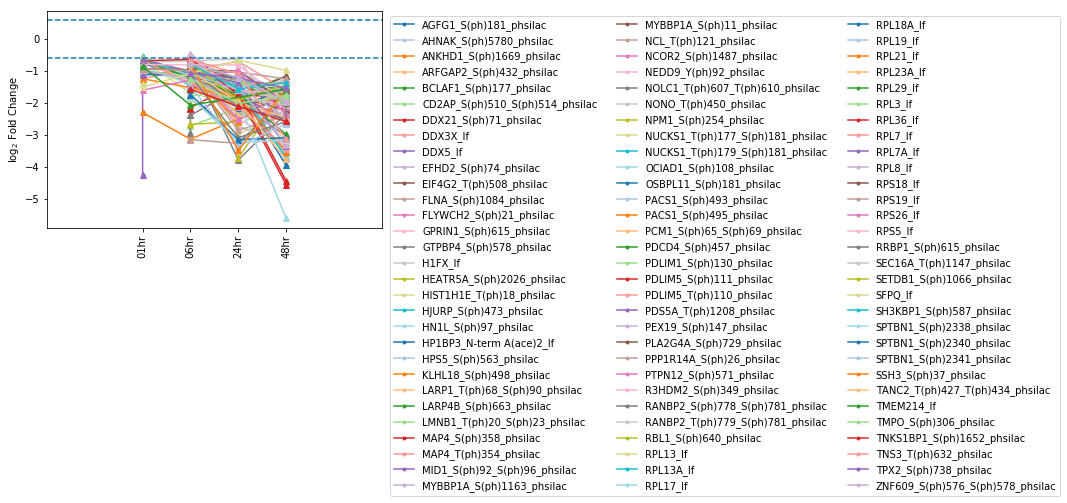

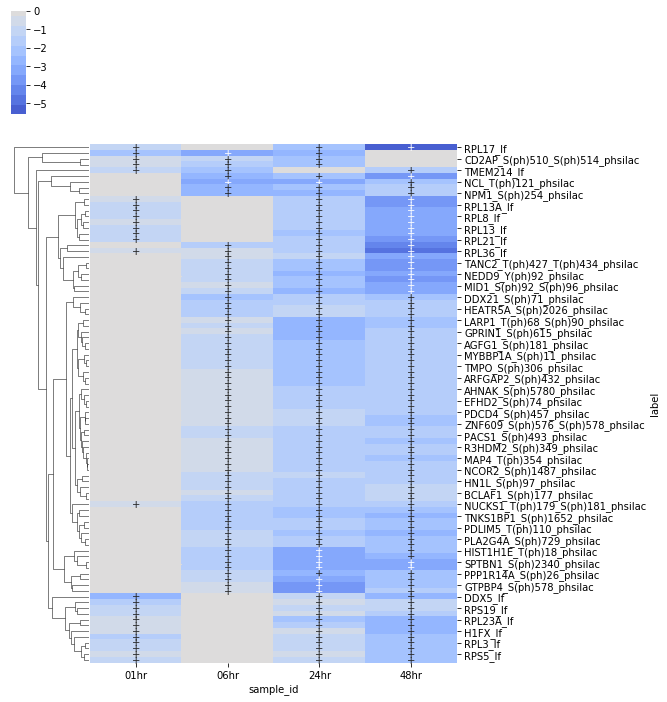

In [51]:
exp_data.proteins.down.filter_by_minimum_sig_columns(min_terms=3, index='label').plot_species(plot_type='matplotlib');
exp_data.proteins.down.filter_by_minimum_sig_columns(min_terms=3, index='label').heatmap(index='label', cluster_row=True);

#### Query 4: 
    Clustered heatmap of label-free data

Number in index went from 4086 to 97


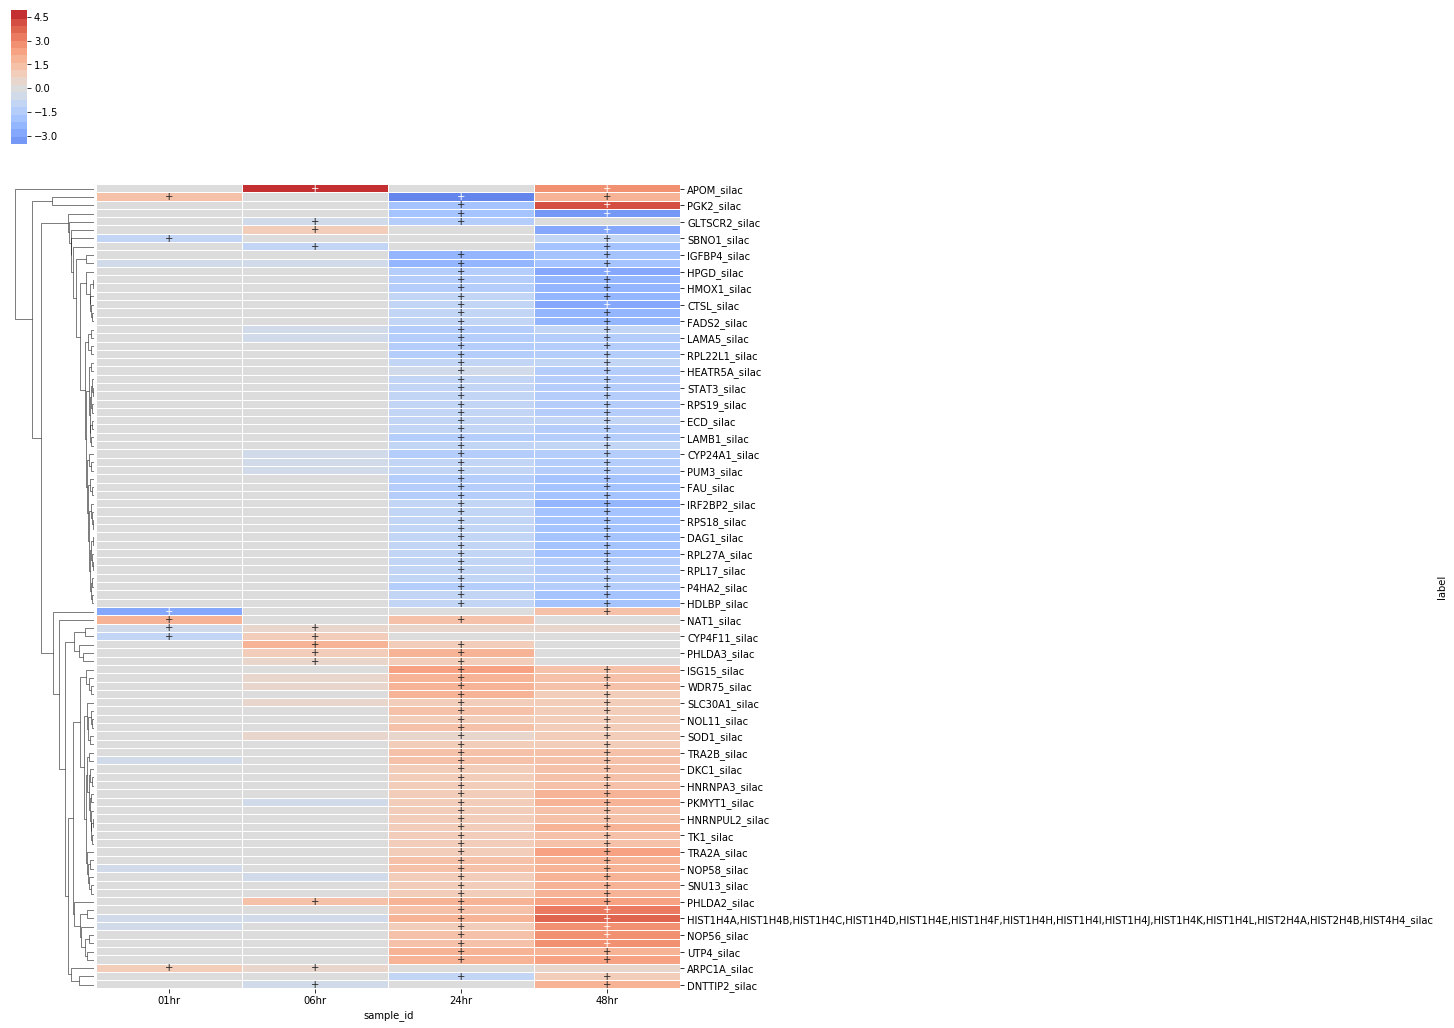

In [59]:
exp_data.silac.heatmap(linewidths=0.01, index='label',
                       cluster_row=True, min_sig=2, figsize=(12,18));

### Extending to other plots

Since our exp_data is built off a pandas.DataFrame, we can use other packages that take that data format. Seaborn is one such tool that provides some very nice plots.

c:\users\pinojc\miniconda3\envs\magine_36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



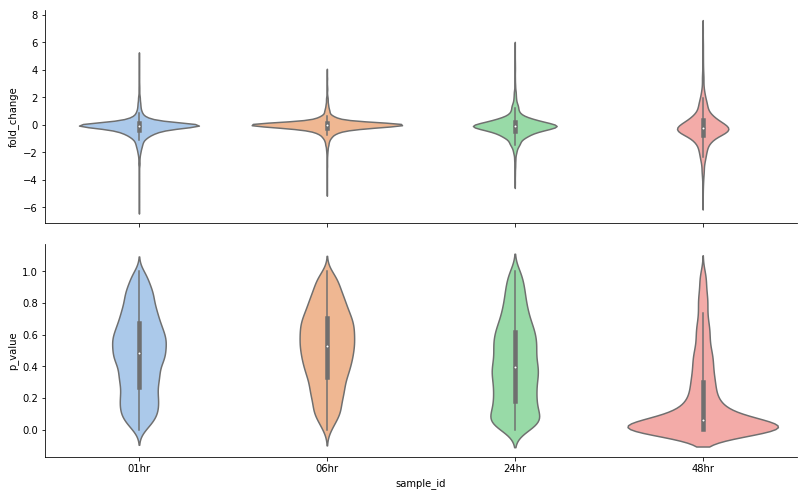

In [63]:
label_free = exp_data.label_free.copy()
label_free.log2_normalize_df(column='fold_change', inplace=True)

g = sns.PairGrid(label_free,
                 x_vars=('sample_id'),
                 y_vars=('fold_change', 'p_value'),
                 hue='source',
                 aspect=3.25, height=3.5)
g.map(
    sns.violinplot, 
    palette="pastel", 
    split=True,
    order=list(label_free.sample_ids)
);

#### Venn diagram comparisons between measurements

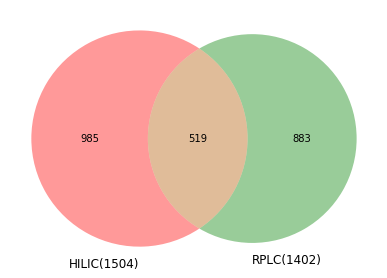

In [64]:
from magine.plotting.venn_diagram_maker import create_venn2, create_venn3

lf = exp_data.label_free.sig.id_list
silac = exp_data.silac.sig.id_list
phsilac = exp_data.ph_silac.sig.id_list
hilic = exp_data.HILIC.sig.id_list
rplc = exp_data.C18.sig.id_list

create_venn2(hilic, rplc, 'HILIC', 'RPLC');

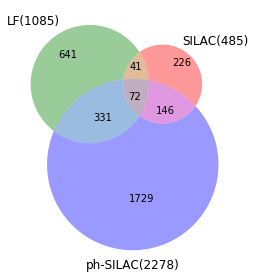

In [65]:
create_venn3(lf, silac, phsilac, 'LF', 'SILAC', 'ph-SILAC');